In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os


print(os.getcwd())
#os.chdir('C:\\Users\\chont\\OneDrive\\Documents\\GitHub\\ECGdataAnalysis\\')
#os.chdir('C:\\Users\\nimch681\\Documents\\git_projects\\ECGdataAnalysis\\')

# Show a 2D plot with the data in beat
def display_signal(beat):
    plt.plot(beat)
    plt.ylabel('Signal')
    plt.show()

# Class for RR intervals features
class RR_intervals:
    def __init__(self):
        # Instance atributes
        self.pre_R = np.array([])
        self.post_R = np.array([])
        self.local_R = np.array([])
        self.global_R = np.array([])

        

class Patient_record:
    def __init__(self,filename, database):
        self.database = database
        self.filename = filename
        self.time = []
        self.MLII = []
        self.denoisedMLII = []
        self.V1 = []
        self.denoisedV1 = []
        self.annotations = []

  

class ecg_database:
    def __init__(self, database):
        # Instance atributes
        self.filename = []
        self.database = database
        self.Annotations =[]
        self.MITBIH_classes = []
        self.AAMI_classes = []
        #self.beat = np.empty([]) # record, beat, lead
        #self.class_ID = []   
        #self.valid_R = []       
        #self.R_pos = []
        #self.orig_R_pos = []

In [5]:
import os
import csv
import pandas as pd 
from scipy.signal import medfilt

def load_mitdb():
    my_db = ecg_database("mitdb")
    pathDB = os.getcwd()+'/database/'
    DB_name = 'mitdb'
    fs = 360
    jump_lines = 1

    #Read files: signal (.csv )  annotations (.txt)    
    fRecords = list()
    fAnnotations = list()

    lst = os.listdir(pathDB + DB_name + "/csv")
    lst.sort()
    fRecords = list()
    fAnnotations = list()
    for file in lst:
        if file.endswith(".csv"):
       
            fRecords.append(file)
        elif file.endswith(".text"):
      
            fAnnotations.append(file)        

    MITBIH_classes = ['N', 'L', 'R', 'e', 'j', 'A', 'a', 'J', 'S', 'V', 'E', 'F']#, 'P', '/', 'f', 'u']
    AAMI_classes = []
    AAMI_classes.append(['N', 'L', 'R'])                    # N
    AAMI_classes.append(['A', 'a', 'J', 'S', 'e', 'j'])     # SVEB 
    AAMI_classes.append(['V', 'E'])                         # VEB
    AAMI_classes.append(['F'])                              # F

    RAW_signals = []
    r_index = 0

    my_db.filename = fRecords
    my_db.Annotations = fAnnotations
    my_db.MITBIH_classes = MITBIH_classes
    my_db.AAMI_classes = AAMI_classes
    #my_db.Annotations = annotations  
    return my_db



In [3]:
def load_patient_record(DB_name, record_number):
    patient_record = Patient_record(record_number, DB_name)
    pathDB = os.getcwd()+'/database/'
    filename = pathDB + DB_name + "/csv/" + record_number +".csv"
    print(filename)
    f = open(filename, "r")
    reader = csv.reader(f, delimiter=',')
    next(reader) # skip first line!
    next(reader)
    MLII_index = 1
    V1_index = 2
    if int(record_number) == 114:
        MLII_index = 2
        V1_index = 1

    MLII = []
    V1 = []
    time = []
    for row in reader:
        time.append((float(row[0])))
        MLII.append((float(row[MLII_index])))
        V1.append((float(row[V1_index])))
    f.close

    filename = pathDB + DB_name + "/csv/" + record_number +".text"
    print(filename)
    f = open(filename, 'rb')
    next(f) # skip first line!

    annotations = []
    for line in f:
        annotations.append(line)
    f.close
    patient_record.filename = record_number
    patient_record.time = time
    patient_record.MLII = MLII
    patient_record.V1 = V1
    patient_record.annotations = annotations

    return patient_record


In [12]:
mit100 = load_patient_record("mitdb","100")
baseline = medfilt(mit100.MLII, 71) 
baseline = medfilt(baseline, 215) 

denoisedMLII = []
denoisedV1 = []
# Remove Baseline
for i in range(0, len(mit100.MLII)):
    denoisedMLII.append(mit100.MLII[i] - baseline[i])

    # TODO Remove High Freqs

            # median_filter1D
baseline = medfilt(mit100.V1, 71) 
baseline = medfilt(baseline, 215) 

            # Remove Baseline
for i in range(0, len(mit100.V1)):
    denoisedV1.append(mit100.V1[i] - baseline[i])

C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/csv/100.csv
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/csv/100.text


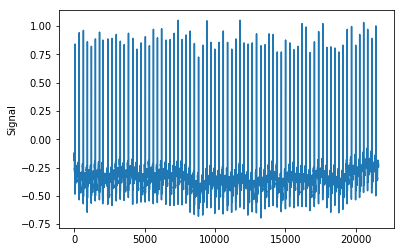

In [13]:
display_signal(mit100.MLII)

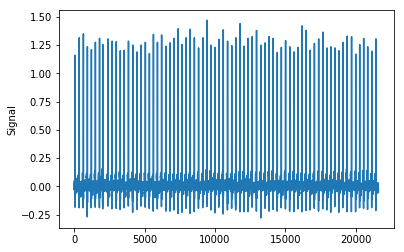

In [14]:
display_signal(denoisedMLII)

C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/csv/100.csv
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/csv/100.text


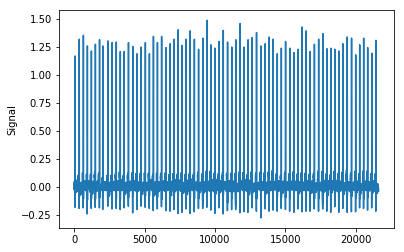

In [15]:
mit100 = load_patient_record("mitdb","100")
baseline = medfilt(mit100.MLII, 35) 
baseline = medfilt(baseline, 101) 

denoisedMLII = []
denoisedV1 = []
# Remove Baseline
for i in range(0, len(mit100.MLII)):
    denoisedMLII.append(mit100.MLII[i] - baseline[i])

display_signal(denoisedMLII)